In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pdb = 'alanine_beta.pdb'
NH = np.genfromtxt(pdb)[[0,5],:][:,5:8]
#XYZ = np.genfromtxt(pdb)[:,5:8]
XYZ = NH
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XYZ[:,0], XYZ[:,1], XYZ[:,2]);

<IPython.core.display.Javascript object>

In [3]:
# Compute scatter matrix
scat = XYZ.T @ XYZ
# Compute singular values or eigenvalues
eigen_vecs, _, _ = np.linalg.svd(scat)
#_, eigen_vecs = np.linalg.eig(scat)

# project XY onto the "principal axes"
XYZ_proj = XYZ @ eigen_vecs

# compute min/max values (or whatever you need)
min_x, min_y, min_z = np.min(XYZ_proj, 0)
max_x, max_y, max_z = np.max(XYZ_proj, 0)

#S radius
Sr = 1.85

ver_proj = np.array([[min_x - Sr, min_y - Sr, min_z - Sr],
                     [min_x - Sr, max_y + Sr, min_z - Sr],
                     [max_x + Sr, min_y - Sr, min_z - Sr],
                     [max_x + Sr, max_y + Sr, min_z - Sr],
                     [min_x - Sr, min_y - Sr, max_z + Sr],
                     [min_x - Sr, max_y + Sr, max_z + Sr],
                     [max_x + Sr, min_y - Sr, max_z + Sr],
                     [max_x + Sr, max_y + Sr, max_z + Sr]])

# project min/max values back to the original system
ver = ver_proj @ eigen_vecs.T
#ver = ver_proj @ eigen_vecs.T # use this with eigenvalues

In [4]:
ver

array([[-1.45495831,  1.34527904, -2.23175235],
       [ 2.66708602,  0.22185434, -1.01480879],
       [-2.27116778, -2.9085546 , -3.39401673],
       [ 1.85087655, -4.0319793 , -2.17707318],
       [-2.65887655,  0.6399793 ,  1.19507318],
       [ 1.46316778, -0.4834454 ,  2.41201673],
       [-3.47508602, -3.61385434,  0.03280879],
       [ 0.64695831, -4.73727904,  1.24975235]])

<IPython.core.display.Javascript object>


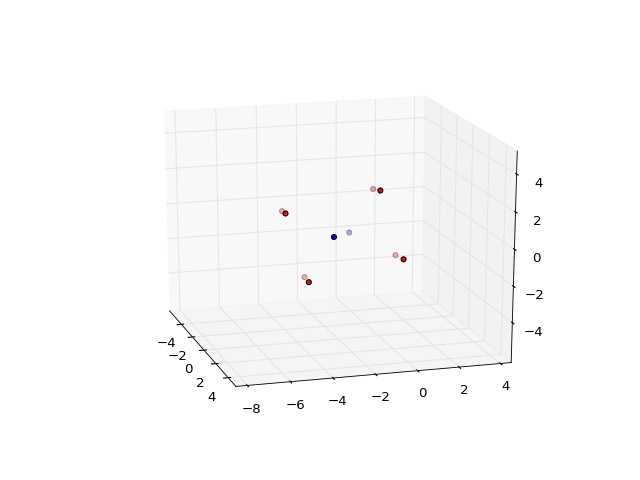

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XYZ[:,0], XYZ[:,1], XYZ[:,2])
ax.scatter(ver[:,0],  ver[:,1], ver[:,2], c ='r');